# Sampling and Interpolation in 1D

The notebook serves to introduce some concepts which are useful with continous signals

## Some Definitions

A time continous function $f(t)$ is related to its Fourier transform $F(u)$ :

$$
F(u) = \int_{-\infty}^{\infty} f(t) \cdot exp\left[-j \cdot 2\pi \cdot u \cdot t \right] \cdot dt
$$

The inverse Fourier transform is given by:

$$
f(t) = \int_{-\infty}^{\infty} F(u) \cdot exp\left[j \cdot 2\pi \cdot u \cdot t \right] \cdot du
$$

Depending on the properties of function $f(t)$ its Fourier transform $F(u)$ may either extend to

1) infinite frequencies (not bandlimited)

2) infinite frequencies but most of the signal energy is located in the finite frequency band $-\frac{B}{2} \le u \le \frac{B}{2}$ (nearly bandlimited)

3) all signal energy confined to frequency band $-\frac{B}{2} \le u \le \frac{B}{2}$ (strictly bandlimited)

For numerical evaluation only the cases *nearly bandlimited* and *strictly bandlimited* considered.


Thus the inverse Fourier transform may written with finite limits for the integral:

$$
f(t) \approx \int_{-\frac{B}{2}}
^{\frac{B}{2}} F(u) \cdot exp\left[j \cdot 2\pi \cdot u \cdot t \right] \cdot du
$$



## Periodic Repetions

In the *signal domain* the function $\tilde{f}(t)$ denotes a periodic repetition of function $f(t)$ with a period $T_f$.

In the *transform domain* the function $\tilde{F}(u)$ denotes a periodic repetion of the Fourier transform $F(u)$ with a period $B_f$.

$$
\tilde{f}(t) = \sum_{n=-\infty}^{\infty} f(t-n \cdot T_f)
$$

$$
\tilde{F}(u) = \sum_{m=-\infty}^{\infty} F(u-m \cdot B_f)
$$

----

Since $\tilde{f}(t)$ and $\tilde{F}(u)$ are periodic they can be written as Fourier series:

$$
\tilde{f}(t) = \sum_{k=-\infty}^{\infty} c_k \cdot exp\left[j \cdot 2\pi \cdot k \cdot \frac{t}{T_f} \right]
$$

$$
\tilde{F}(u) = \sum_{l=-\infty}^{\infty} C_l \cdot exp\left[-j \cdot 2\pi \cdot l \cdot \frac{u}{B_f} \right]
$$


**signal domain**

For the signal domain representation the Fourier coefficients $c_k$ are determined:

$$\begin{gather}
c_k = \frac{1}{T_f} \int_{0}^{T_f} \tilde{f}(t) \cdot exp\left[-j \cdot 2\pi \cdot k \cdot \frac{t}{T_f} \right] \cdot dt \\
c_k = \frac{1}{T_f} \sum_{n=-\infty}^{\infty} \int_{0}^{T_f} f(t-n \cdot T_f) \cdot exp\left[-j \cdot 2\pi \cdot k \cdot \frac{t}{T_f} \right] \cdot dt \\
c_k = \frac{1}{T_f} \int_{-\infty}^{\infty} f(t) \cdot exp\left[-j \cdot 2\pi \cdot k \cdot \frac{t}{T_f} \right] \cdot dt \\
c_k = \frac{1}{T_f} \cdot F\left(\frac{k}{T_f} \right)
\end{gather}
$$

Apart from a scaling factor $\frac{1}{T_f}$ the Fourier series coefficient $c_k$ related to the value of the Fourier transform at discrete frequency $\frac{k}{T_f}$. The fundamental frequency is $\frac{1}{T_f}$.

Hence we have these equations for the periodic repetition $\tilde{f}(t)$ of $f(t)$:

$$\begin{gather}
\tilde{f}(t) = \sum_{n=-\infty}^{\infty} f(t-n \cdot T_f) \\
\tilde{f}(t) = \frac{1}{T_f} \sum_{k=-\infty}^{\infty}  F\left(\frac{k}{T_f} \right) \cdot exp\left[j \cdot 2\pi \cdot k \cdot \frac{t}{T_f} \right]
\end{gather}
$$


**transform domain**

For the transform domain the Fourier coefficients $C_k$ are determined:

$$\begin{gather}
C_l = \frac{1}{B_f} \int_{-B_f/2}^{B_f/2} \tilde{F}(u) \cdot exp\left[j \cdot 2\pi \cdot l \cdot \frac{u}{B_f} \right] \cdot du\\
C_l = \frac{1}{B_f} \sum_{m=-\infty}^{\infty} \int_{-B_f/2}^{B_f/2} F(u-m \cdot B_f) \cdot exp\left[j \cdot 2\pi \cdot l \cdot \frac{u}{B_f} \right] \cdot du
\end{gather}
$$

This equation can be re-expressed as with an integral having infinite limits.

$$\begin{gather}
C_l = \frac{1}{B_f} \int_{-\infty}^{\infty} F(u) \cdot exp\left[j \cdot 2\pi \cdot l \cdot \frac{u}{B_f} \right] \cdot du \\
C_l = \frac{1}{B_f} \cdot f\left(\frac{l}{B_f} \right)
\end{gather}
$$

Defining the sampling interval $T_s$ by $T_s = \frac{1}{B_f}$ the Fourier series coefficients $C_l$ are expressed in terms $f(t)$ taken at samples spaced $T_s$ apart.

Now the periodic repetitions $\tilde{F}(u)$ can be expressed by equation:

$$\begin{gather}
\tilde{F}(u) = T_s \cdot \sum_{l=-\infty}^{\infty} f\left(\frac{l}{B_f} \right) \cdot exp\left[-j \cdot 2\pi \cdot l \cdot \frac{u}{B_f} \right] \\
\tilde{F}(u) = T_s \cdot \sum_{l=-\infty}^{\infty} f\left(l \cdot T_s \right) \cdot exp\left[-j \cdot 2\pi \cdot l \cdot u \cdot T_s \right]
\end{gather}
$$

If $f(t)$ is a function with bandlimited Fourier transform $F(u)$ (defined only for $[-B/2, ...,B/2]$ ) and if $B_f \le B$ we have:

$$
\tilde{F}(u) = F(u) \ for \ -B/2 \le u \le B/2 
$$

and therefore:

$$
F(u) = \begin{cases} \sum_{l=-\infty}^{\infty} T_s \cdot f(l \cdot T_s) \cdot exp\left[-j \cdot 2\pi \cdot l \cdot T_s \cdot u \right] & -B/2 \le u \le B/2 \\
0 & otherwise \end{cases}
$$

## Sampling Theorem

From the last equation some form of the `Sampling Theorem` can be derived.

We start with 

$$
F(u) = \sum_{l=-\infty}^{\infty} T_s \cdot f(l \cdot T_s) \cdot exp\left[-j \cdot 2\pi \cdot l \cdot T_s \cdot u \right]
$$

and compute the inverse Fourier transform:

$$\begin{gather}
f(t) = \int_{-B_f/2}^{B_f/2} F(u) \cdot exp\left[j \cdot 2\pi \cdot t \cdot u \right] \cdot du \\
f(t) = \sum_{l=-\infty}^{\infty} T_s \cdot f(l \cdot T_s) \cdot \int_{-B_f/2}^{B_f/2} exp\left[j \cdot 2\pi \cdot \left(t - l \cdot T_s\right) \cdot u \right] \cdot du \\
f(t) = \sum_{l=-\infty}^{\infty} f(l \cdot T_s) \cdot sinc\left(\pi \cdot \left(\frac{t}{T_s} - l\right)\right)
\end{gather}
$$

The last equation expresses the continous function $f(t)$ as a series expansion with samples $f(l \cdot T)$ as coefficients and the $sinc()$ function as the *interpolation* function.

## 1D Discrete Fourier Transform

The periodic function $\tilde{f}(t)$ has been obtained from periodically repeating function $f(t)$ with a period of $T_f$.

$$\begin{gather}
\tilde{f}(t) = \sum_{n=-\infty}^{\infty} f(t-n \cdot T_f) \\
\tilde{f}(t) = \frac{1}{T_f} \sum_{k=-\infty}^{\infty}  F\left(\frac{k}{T_f} \right) \cdot exp\left[j \cdot 2\pi \cdot k \cdot \frac{t}{T_f} \right]
\end{gather}
$$

Now the time interval $t_0 \lt t \lt (t_0 + T_f)$ is partitioned into $N$ subintervals of duration $T = T_f/N$. The periodic function $\tilde{f}(t)$ is evaluated/sampled for $t = t_0 + m \cdot T,\ 0 \le m \le N-1$.

$$
\tilde{f}(m \cdot T;\ t_0) = \frac{1}{T_f} \sum_{k=-\infty}^{\infty}  F\left(\frac{k}{T_f} \right) \cdot exp\left[j \cdot 2\pi \cdot k \cdot \frac{t_0}{T_f} \right] \cdot exp\left[j \cdot 2\pi \cdot \frac{1}{N} \cdot k \cdot m \right]
$$

Summation index $k$ shall be expressed by:

$$\begin{gather}
k = l + r \cdot N \\
0 \le l \le N-1 \\
-\infty \lt r \lt \infty
\end{gather}
$$

Moreover let $u_0=\frac{1}{T_f}$ be the fundamental frequency.

$$\begin{gather}
\tilde{f}(m \cdot T;\ t_0) = u_0 \cdot \sum_{l=0}^{N-1} \underbrace{\sum_{r=-\infty}^{\infty} F\left( l \cdot u_0 + r \cdot N \cdot u_0 \right) \cdot exp\left[j \cdot 2\pi \cdot (l  + r \cdot N) \cdot u_0 \cdot t_0 \right] }_{\overline{F}\left( l \cdot u_0 \right)} \cdot exp\left[j \cdot 2\pi \cdot \frac{1}{N} \cdot l \cdot m \right] \\
\tilde{f}(m \cdot T;\ t_0) = u_0 \cdot \sum_{l=0}^{N-1} \overline{F}\left( l \cdot u_0 \right) \cdot exp\left[j \cdot 2\pi \cdot \frac{1}{N} \cdot l \cdot m \right]
\end{gather}
$$

Here the coefficient $\overline{F}\left( l \cdot f_0 \right)$ denotes a sample of the *aliased* value of the Fourier transform.

$$
\overline{F}\left( l \cdot u_0 \right) = \sum_{r=-\infty}^{\infty} F\left( l \cdot u_0 + r \cdot N \cdot u_0 \right) \cdot exp\left[j \cdot 2\pi \cdot (l  + r \cdot N) \cdot u_0 \cdot t_0 \right]
$$

It is instructing to look at the special case of $F(u)$ beeing *nearly/perfectly* bandlimited. We consider the cases

1) `N` is even

2) `N` is odd

The largest positive frequency is denoted $u_{(+)}$ and smallest negative frequency $u_{(-)}$.

**N even**

$$\begin{gather}
u_{(-)} = -(N/2 - 1) \cdot u_0 \\
u_{(+)} = (N/2 - 1) \cdot u_0
\end{gather}
$$

**N odd**

$$\begin{gather}
u_{(-)} = -\frac{N - 1}{2} \cdot u_0 \\
u_{(+)} = \frac{N - 1}{2} \cdot u_0
\end{gather}
$$

With $r=0$ positive frequencies belong to the range of index $l$ :


$$\begin{gather}
\overline{F}\left( l \cdot u_0 \right) =  F\left( l \cdot u_0 \right) \cdot exp\left[j \cdot 2\pi \cdot l \cdot u_0 \cdot t_0 \right] \\
l = \begin{cases} 0 \le l \le (N/2 - 1) & N \ even\\
0 \le l \le \frac{N - 1}{2} & N \ odd
\end{cases}
\end{gather}
$$

and with $r=-1$ negative frequencies are in range of index $l$:

$$\begin{gather}
\overline{F}\left( l \cdot u_0 \right) = F\left( -(N-l) \cdot u_0 \right) \cdot exp\left[-j \cdot 2\pi \cdot (N-l) \cdot u_0 \cdot t_0\right] \\
l = \begin{cases} (N/2 + 1) \le l \le (N - 1) & N \ even\\-
\frac{N + 1}{2} \le l \le (N - 1) & N \ odd
\end{cases}
\end{gather}
$$

----

### Application

But first a summary of what it is known already:

**summary**

The relationsship of samples $\tilde{f}(m \cdot T;\ t_0)$ to samples of the aliased Fourier transform $\overline{F}\left( l \cdot f_0 \right) $ have been found:

$$
\tilde{f}(m \cdot T;\ t_0) = u_0 \cdot \sum_{l=0}^{N-1} \overline{F}\left( l \cdot f_0 \right) \cdot exp\left[j \cdot 2\pi \cdot \frac{1}{N} \cdot l \cdot m \right]
$$

For the practically important case of  $\tilde{f}(t)$ being bandlimited the aliased Fourier transform is related to positive frequencies $u \le 0$ like this:

$$
\overline{F}\left( l \cdot u_0 \right) = F\left( l \cdot u_0 \right) \cdot exp\left[j \cdot 2\pi \cdot l \cdot u_0 \cdot t_0 \right]
$$

and for negative frequencies $u \lt 0$ like this:

$$
\overline{F}\left( l \cdot u_0 \right) = F\left( -(N-l) \cdot u_0 \right) \cdot exp\left[-j \cdot 2\pi \cdot (N - l) \cdot u_0 \cdot t_0 \right]
$$

If taking samples of $\tilde{f}(t)$ starts at $t_0=0$ the samples of the aliased Fourier transform equal exactly the samples of Fourier transform $F(u)$. For any other starting point $t_0$ an additional phase component occurs.

An example shall serve as a illustration:

The function / signal $f(t)$ is defined on the range $-a \le t \le -a + T_f$:

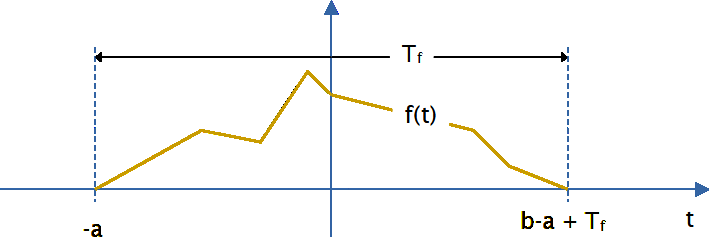

Based on this the periodic repetition $\tilde{f}(t)$ is constructed.


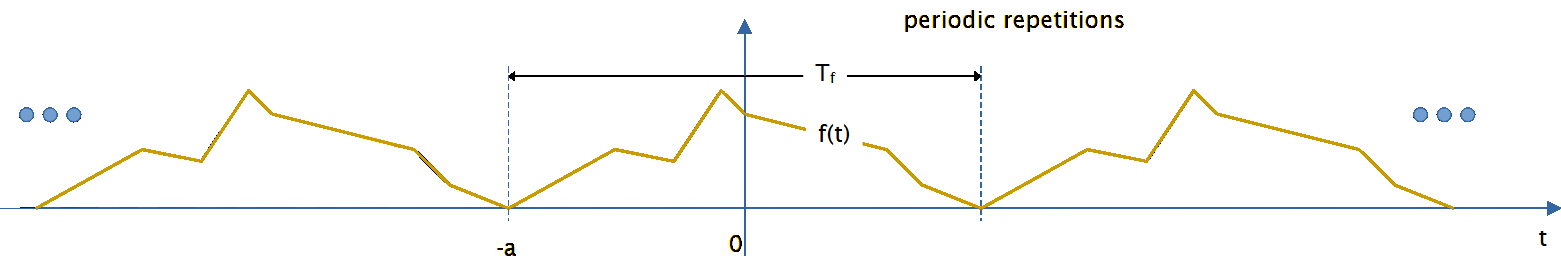

A single period of $\tilde{f}(t)$ is sampled. $N$ samples are taken starting at $t_0=0$. The figure shows that the sequence starts with samples of $f(t)$ for $t \ge 0$ and then samples of $f(t)$ for $t \lt 0$.


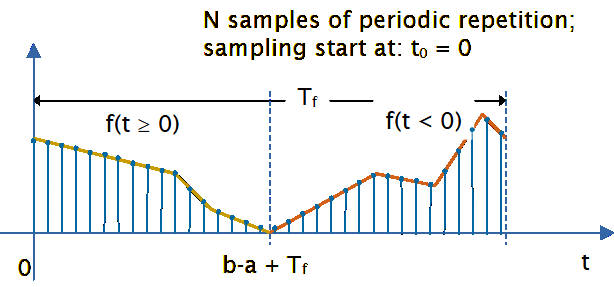


